In [1]:
import matplotlib.pyplot as plt
import neuralnet as nn
import numpy as np
from PIL import Image, ImageOps

In [2]:
pathes =['forks', 'knifes', 'spoons']
marks = [[0, 0], [1, 1], [1, 0]]

x_train_full, x_test_full, y_train, y_test = nn.get_images_train_test(pathes, marks, invert=True)

In [3]:
def resize(x_arr, size):
    x_out = []
    for i in range(len(x_arr)):
        x_out.append(np.asarray(x_arr[i].resize(size)))
        if i + 1 == len(x_arr):
            break
    return x_out

In [4]:
size = (24, 24)

x_train_full = resize(x_train_full, size)
x_test_full = resize(x_test_full, size)

In [17]:
x_train = x_train_full.copy()
x_test = x_test_full.copy()

In [15]:
def show(x, y):
    plt.figure(figsize=(15, 21))
    for i in range(8):
        plt.subplot(6, 4, 1 + i)
        plt.imshow(ImageOps.invert(Image.fromarray(x[i])))
        index = marks.index(y[i])
        plt.title(pathes[index][:len(pathes[index]) - 1])

In [ ]:
show(x_train_full, y_train)

In [6]:
def transform(x : np.array):
    round = lambda value : 1 if value > 0 else 0
    for i in range(len(x)):
        for j in range(0, len(x[i]), 3):
            x[i][j] = round(x[i][j])
            x[i][j + 1] = round(x[i][j + 1])
            x[i][j + 2] = round(x[i][j + 2])
    return x

In [7]:
x_train = np.array([x_train[i].reshape([-1]) for i in range(len(x_train))])
x_test = np.array([x_test[i].reshape([-1]) for i in range(len(x_test))])

x_train = transform(x_train)
x_test = transform(x_test)

In [8]:
arch = [128, 64, 2]

In [9]:
elman = nn.ElmanNet(len(x_train[0]), arch)
elman.train_speed_decrease_func = nn.train_speed_dont_decrease_func
elman.train_size_epoch = 1 / len(x_train)

In [10]:
elman.fit(x_train, y_train, 0.5, 150, max_error=None, min_hitrate=None)

epoch 1 has started, error = 0.6619096745147122, hitrate = 0.0, aim = [0 0]
epoch 2 has started, error = 0.01670346992097245, hitrate = 1.0, aim = [0 0]
epoch 3 has started, error = 0.013710087524791244, hitrate = 1.0, aim = [0 0]
epoch 4 has started, error = 1.43060220664163, hitrate = 0.0, aim = [1 1]
epoch 5 has started, error = 0.17724711744638788, hitrate = 1.0, aim = [0 0]
epoch 6 has started, error = 0.02660845185726425, hitrate = 1.0, aim = [0 0]
epoch 7 has started, error = 0.45537540437193946, hitrate = 0.0, aim = [1 0]
epoch 8 has started, error = 0.02692041054538031, hitrate = 1.0, aim = [1 0]
epoch 9 has started, error = 0.7286687287451291, hitrate = 0.0, aim = [1 1]
epoch 10 has started, error = 0.385596986695665, hitrate = 0.0, aim = [0 0]
epoch 11 has started, error = 0.5554451414411845, hitrate = 0.0, aim = [1 1]
epoch 12 has started, error = 0.24093078231046605, hitrate = 1.0, aim = [0 0]
epoch 13 has started, error = 0.029785521176855706, hitrate = 1.0, aim = [0 0]
e

In [11]:
elman.get_mse_hitrate(x_test, y_test)

(0.16528702963827951, 0.6666666666666666)

In [9]:
net = nn.Net(len(x_train[0]), arch)

In [17]:
net.train_speed_decrease_func = nn.train_speed_dont_decrease_func
net.train_size_epoch = 1 / len(x_train)

In [ ]:
net.fit(x_train, y_train, 0.5, 150, max_error=None, min_hitrate=None)

In [9]:
round = lambda x : [np.round(x[i]) for i in range(len(x))]

def predict_by_photo(model : nn.Net, x_convert, x_show, y_test, y_values):
    rows = int(np.ceil(len(x_train) / 4))
    plt.figure(figsize=(15, rows * 4))
    for i in range(len(x_convert)):
        plt.subplot(rows, 4, 1  + i)
        plt.imshow(ImageOps.invert(Image.fromarray(x_show[i])))

        title = ''
        try:
            index = y_values.index(round(model.predict(x_convert[i])))
            pr = pathes[index][:len(pathes[index]) - 1]
            index = y_values.index(y_test[i])
            exp = pathes[index][:len(pathes[index]) - 1]
            title = f'pr: {pr}; exp = {exp}'
            #title = str(model.predict(x[i]))
        except:
            title = '???'
            
        plt.title(title)
        

In [11]:
mse, hitrate = net.get_mse_hitrate(x_test, y_test)
print(f'mse = {mse}, hitrate = {hitrate}')
predict_by_photo(net, x_test, x_test_full, y_test, marks)

NameError: name 'net' is not defined

In [10]:
netCG = nn.NetGC(len(x_train[0]), arch)

In [11]:
netCG.train_speed_decrease_func = nn.train_speed_dont_decrease_func

In [12]:
netCG.fit(x_train, y_train, 0.9, 1000, max_error=None, min_hitrate=0.9)

epoch 1 has started, error = 0.33615047651524516, hitrate = 0.012152777777777778
epoch 2 has started, error = 0.09658514890140156, hitrate = 0.03993055555555556
fitted by error


mse = 0.07166048640083447, hitrate = 0.8333333333333334


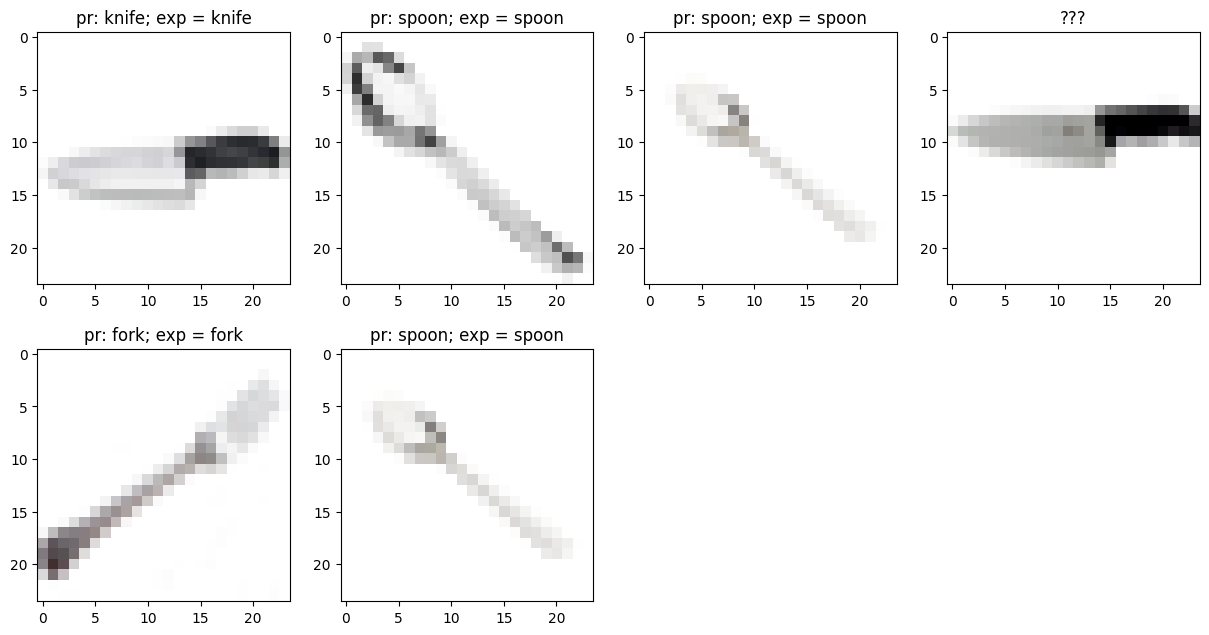

In [13]:
mse, hitrate = netCG.get_mse_hitrate(x_test, y_test)
print(f'mse = {mse}, hitrate = {hitrate}')
predict_by_photo(netCG, x_test, x_test_full, y_test, marks)